In [1]:
                               ############### IMPORTATION DES PACKAGES ###################

import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier

In [2]:
                        ################## IMPORTATION DES DATASETS ET CONCATENATION ######################

# Chargement des fichiers PTB
ptb_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('ptbdb_normal.csv', header=None)
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)
    
# Chargement des fichiers MITBIH
mit_train = pd.read_csv('mitbih_train.csv', header=None)
mit_test = pd.read_csv('mitbih_test.csv', header=None)
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)
mit['class'].replace({2:1, 3:1, 4:1}, inplace=True)
    
# Concaténation des deux ensembles de données
data = pd.concat([ptb, mit], ignore_index=True, sort=False)
    
# Variables cibles
y = data['class'].copy()
    
# Features
X = data.drop('class', axis=1).copy()

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, shuffle=True)

In [ ]:
                        ################ MODÈLE KNN AVEC K = 5 PAR DEFAUT ###########################

# Instance du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Mesurer le temps de début
start_time = time.time()

# Entraînement du modèle sur les données d'entraînement
knn.fit(X_train, y_train)

# Mesurer le temps de fin
end_time = time.time()

# Calcul du temps total d'entraînement en secondes
training_time = end_time - start_time

# Prédiction sur les données de test
y_pred = knn.predict(X_test)

# Mesurer le temps de fin
end_time = time.time()

# Calcul du temps total d'exécution en secondes
total_time = end_time - start_time

print("Modèle KNN avec k = 5\n")
print("Temps d'entraînement: {:.2f} secondes".format(training_time))
print("Temps d'exécution: {:.2f} secondes".format(total_time))

print(classification_report(y_test, y_pred))

In [ ]:
                            ######### LEARNING CURVE DU MODÈLE KNN AVEC K = 5 #################
                            
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=knn,
                     scoring='accuracy')

In [ ]:
    ################## MODÈLE KNN AVEC PCA POUR UNE RECHERCHE D'UN K OPTIMAL AMÉLIORANT LES PERFORMANCES #####################

# Appliquer la PCA pour réduire la dimensionnalité de vos données
pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)

# Paramètres du modèle KNN
k_values = range(1, 15)  # Gamme de valeurs de k à tester
weights = 'uniform'  # méthode de pondération 
accuracies = []  # Liste pour stocker les scores d'exactitude pour chaque valeur de k

# Boucle pour entraîner et évaluer le modèle KNN pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn.fit(X_train_pca, y_train)  # Utiliser les données réduites en dimensionnalité
    y_pred = knn.predict(X_train_pca)
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'o-')
plt.title("Performance du modèle KNN en fonction de la valeur de k avec PCA")
plt.xlabel("Valeur de k")
plt.ylabel("Exactitude")
plt.grid(True)
plt.show()

# Trouver la meilleure valeur de k
best_k = k_values[np.argmax(accuracies)]
print("Meilleure valeur de k : ", best_k)

In [ ]:
                ################# MODÈLE KNN AVEC LA VALEUR DE K TROUVÉE VIA LE CODE PRÉCÉDENT ########################

# Instance du modèle KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Mesurer le temps de début
start_time = time.time()

# Entraînement du modèle sur les données d'entraînement
knn.fit(X_train, y_train)

# Mesurer le temps de fin
end_time = time.time()

# Calcul du temps total d'entraînement en secondes
training_time = end_time - start_time

# Prédiction sur les données de test
y_pred = knn.predict(X_test)

# Mesurer le temps de fin
end_time = time.time()

# Calcul du temps total d'exécution en secondes
total_time = end_time - start_time

print("Modèle KNN avec k = 5\n")
print("Temps d'entraînement: {:.2f} secondes".format(training_time))
print("Temps d'exécution: {:.2f} secondes".format(total_time))

print(classification_report(y_test, y_pred))

In [ ]:
                        ################## LEARNING CURVE DU MODÈLE KNN AVEC K = 1 #################
                            
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=knn,
                     scoring='accuracy')

In [ ]:
            ################# MODÈLE KNN AVEC K = 1 ET UNE INSTANCIATION DE LA RÉGULARISATION RIDGE ######################

# Création du modèle KNN avec k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Création du modèle Ridge avec KNN en tant que classifieur
ridge = make_pipeline(StandardScaler(), RidgeClassifier(alpha=0.1))

# Entraînement du modèle KNN sur les données d'entraînement
knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_knn = knn.predict(X_test)

# Entraînement du modèle Ridge sur les prédictions du modèle KNN
ridge.fit(knn.predict_proba(X_train), y_train)

# Prédiction sur les données de test
y_pred = ridge.predict(knn.predict_proba(X_test))

# Affichage des résultats
print(classification_report(y_test, y_pred))

In [ ]:
                        ############ LEARNING CURVE DU MODÈLE KNN AVEC RÉGULARISATION RIDGE #################

plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=knn,
                     scoring='accuracy')

plt.show();

In [5]:
                    ################## MODÈLE KNN AVEC K = 3 ET OVERSAMPLING #########################

# Effectuer l'oversampling de la classe minoritaire
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) # type: ignore

# Définir le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Définissez les hyperparamètres souhaités pour KNN

# Entraîner le modèle KNN sur les données suréchantillonnées
knn_model.fit(X_train_resampled, y_train_resampled) # type: ignore

# Faire des prédictions sur l'ensemble de test
y_pred = knn_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Exactitude : 0.96
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     18990
         1.0       0.91      0.94      0.92      5810

    accuracy                           0.96     24800
   macro avg       0.94      0.96      0.95     24800
weighted avg       0.96      0.96      0.96     24800



([0.9549349732835971,
  0.9658752961338777,
  0.9704963204408751,
  0.9740164822702185,
  0.9760479041916168,
  0.9772841829362546,
  0.979046055473948,
  0.9803674487764309,
  0.9810591635117274,
  0.9818343111756286],
 [0.9190725806451613,
  0.9341935483870968,
  0.9442338709677419,
  0.9492338709677419,
  0.9541129032258064,
  0.9569354838709677,
  0.9593145161290323,
  0.9616935483870968,
  0.9632661290322581,
  0.9653225806451613])

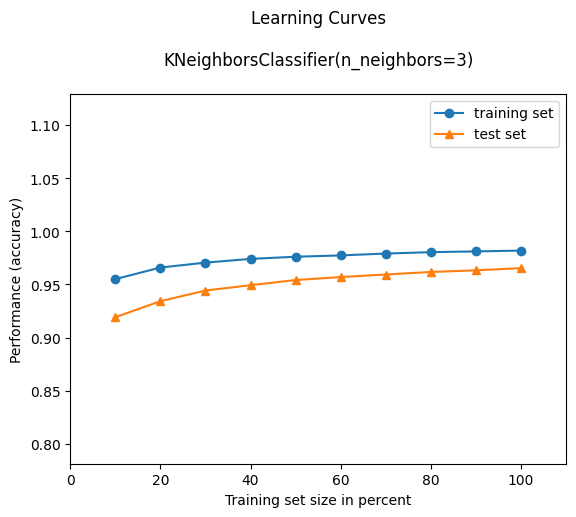

In [6]:
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=knn_model,
                     scoring='accuracy')

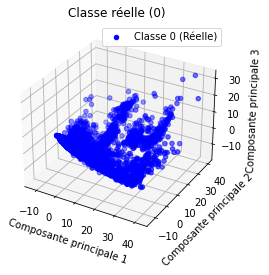

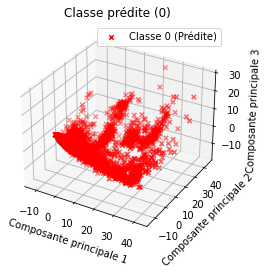

In [13]:
################# KNN AVEC PCA À 3 DIMENSIONS POUR COMPARER LA FORME DU CLUSTER DES CLASSES RÉELS PAR RAPPORT À CELLES PRÉDITES DE LA CLASSE 0 #########################

# Réduire les dimensions à 3 avec PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Créer le modèle KNN 
k = 3  
model = KNeighborsClassifier(n_neighbors=k)

# Entraîner le modèle
model.fit(X_train_pca, y_train)

# Prédire les clusters pour les données de test
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)

# Créer une figure en 3D pour la classe réelle
fig_real = plt.figure()
ax_real = fig_real.add_subplot(111, projection='3d')

# Tracer les points de test pour la classe réelle (classe 0)
indices_real = np.where(y_test == 0)
ax_real.scatter(X_test_pca[indices_real, 0], X_test_pca[indices_real, 1], X_test_pca[indices_real, 2], c='blue', marker='o', label='Classe 0 (Réelle)')

# Ajouter une légende et les titres des axes pour la classe réelle
ax_real.set_xlabel('Composante principale 1')
ax_real.set_ylabel('Composante principale 2')
ax_real.set_zlabel('Composante principale 3')
ax_real.set_title('Classe réelle (0)')
ax_real.legend()

# Créer une figure en 3D pour la classe prédite
fig_pred = plt.figure()
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Tracer les points de test pour la classe prédite (classe 0)
indices_pred = np.where(y_pred == 0)
ax_pred.scatter(X_test_pca[indices_pred, 0], X_test_pca[indices_pred, 1], X_test_pca[indices_pred, 2], c='red', marker='x', label='Classe 0 (Prédite)')

# Ajouter une légende et les titres des axes pour la classe prédite
ax_pred.set_xlabel('Composante principale 1')
ax_pred.set_ylabel('Composante principale 2')
ax_pred.set_zlabel('Composante principale 3')
ax_pred.set_title('Classe prédite (0)')
ax_pred.legend()

# Afficher les graphiques en 3D
plt.show()

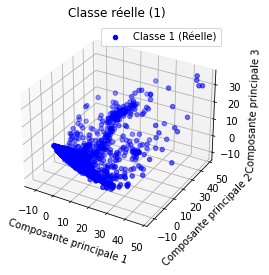

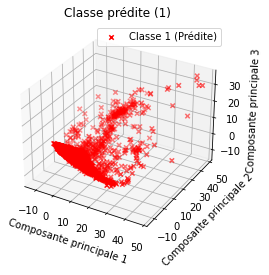

In [14]:
################# KNN AVEC PCA À 3 DIMENSIONS POUR COMPARER LA FORME DU CLUSTER DES CLASSES RÉELS PAR RAPPORT À CELLES PRÉDITES DE LA CLASSE 1 #########################

# Réduire les dimensions à 3 avec PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Créer le modèle KNN avec le meilleur k choisi
k = 3  # Remplacez par le meilleur k que vous avez sélectionné
model = KNeighborsClassifier(n_neighbors=k)

# Entraîner le modèle
model.fit(X_train_pca, y_train)

# Prédire les clusters pour les données de test
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)

# Créer une figure en 3D pour la classe réelle
fig_real = plt.figure()
ax_real = fig_real.add_subplot(111, projection='3d')

# Tracer les points de test pour la classe réelle (classe 1)
indices_real = np.where(y_test == 1)
ax_real.scatter(X_test_pca[indices_real, 0], X_test_pca[indices_real, 1], X_test_pca[indices_real, 2], c='blue', marker='o', label='Classe 1 (Réelle)')

# Ajouter une légende et les titres des axes pour la classe réelle
ax_real.set_xlabel('Composante principale 1')
ax_real.set_ylabel('Composante principale 2')
ax_real.set_zlabel('Composante principale 3')
ax_real.set_title('Classe réelle (1)')
ax_real.legend()

# Créer une figure en 3D pour la classe prédite
fig_pred = plt.figure()
ax_pred = fig_pred.add_subplot(111, projection='3d')

# Tracer les points de test pour la classe prédite (classe 1)
indices_pred = np.where(y_pred == 1)
ax_pred.scatter(X_test_pca[indices_pred, 0], X_test_pca[indices_pred, 1], X_test_pca[indices_pred, 2], c='red', marker='x', label='Classe 1 (Prédite)')

# Ajouter une légende et les titres des axes pour la classe prédite
ax_pred.set_xlabel('Composante principale 1')
ax_pred.set_ylabel('Composante principale 2')
ax_pred.set_zlabel('Composante principale 3')
ax_pred.set_title('Classe prédite (1)')
ax_pred.legend()

# Afficher les graphiques en 3D
plt.show()